In [194]:
import pandas as pd
#import numpy for numerical calculations
import numpy as np
#for data visualization
import seaborn as sns
#for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
#ignore warnings
#import warnings
#warnings.filterwarnings("ignore")


In [195]:
import pandas_profiling

In [196]:
#Global variable for train/test file paths
train_filepath = "C:/Users/sandeep.ram/Desktop/AV/LoanPred_new/train_u6lujuX_CVtuZ9i.csv"
test_filepath = "C:/Users/sandeep.ram/Desktop/AV/LoanPred_new/test_Y3wMUE5_7gLdaTN.csv"

In [197]:
train_filepath

'C:/Users/sandeep.ram/Desktop/AV/LoanPred_new/train_u6lujuX_CVtuZ9i.csv'

In [198]:
#read training and test data
train_data = pd.read_csv(train_filepath)
test_data = pd.read_csv(test_filepath)

In [199]:
#make copy of training & test datasets to avoid any data loss due to edits
train_original = train_data.copy()
test_original = test_data.copy()

In [200]:
#look at features in training data
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [201]:
#look at features in test data
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [202]:
#Print data types of each variable
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [203]:
##object: Object format means variables are categorical. Categorical variables in our dataset are: 
#int64: It represents the integer variables
#float64: It represents the variable which have some decimal values involved. They are also numerical variables.

In [204]:
#lets look at the shape to get the number of records/columns
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [205]:
## we will do univariate analysis now. It is the simplest form of analyzing data where we examine each variable individually. 
##For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. 
##For numerical features, probability density plots can be used to look at the distribution of the variable.

In [206]:
##We will first look at the target variable.
##As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.
##Frequency table of a variable will give us the count of each category in that variable.

In [207]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [208]:
# Normalize can be set to True to print proportions instead of number 

In [209]:
train_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

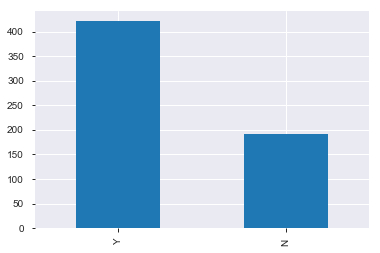

In [210]:
#Plot bar chart
train_data["Loan_Status"].value_counts().plot.bar()

In [211]:
#The loan of 422(around 69%) people out of 614 was approved.

In [212]:
#Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.
##Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
##Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
##Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)
##Let’s visualize the categorical and ordinal features first.

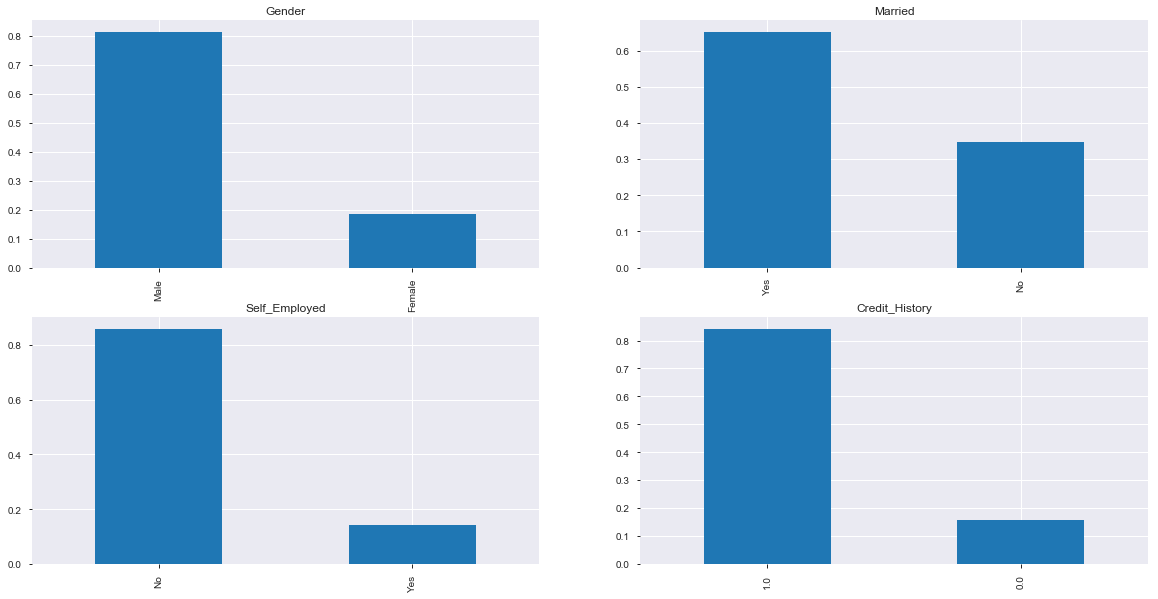

In [213]:
plt.figure(1)
plt.subplot(221)
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

In [214]:
#It can be inferred from the above bar plots that:
#80% applicants in the dataset are male.
#Around 65% of the applicants in the dataset are married.
#Around 15% applicants in the dataset are self employed.
#Around 85% applicants have repaid their debts.

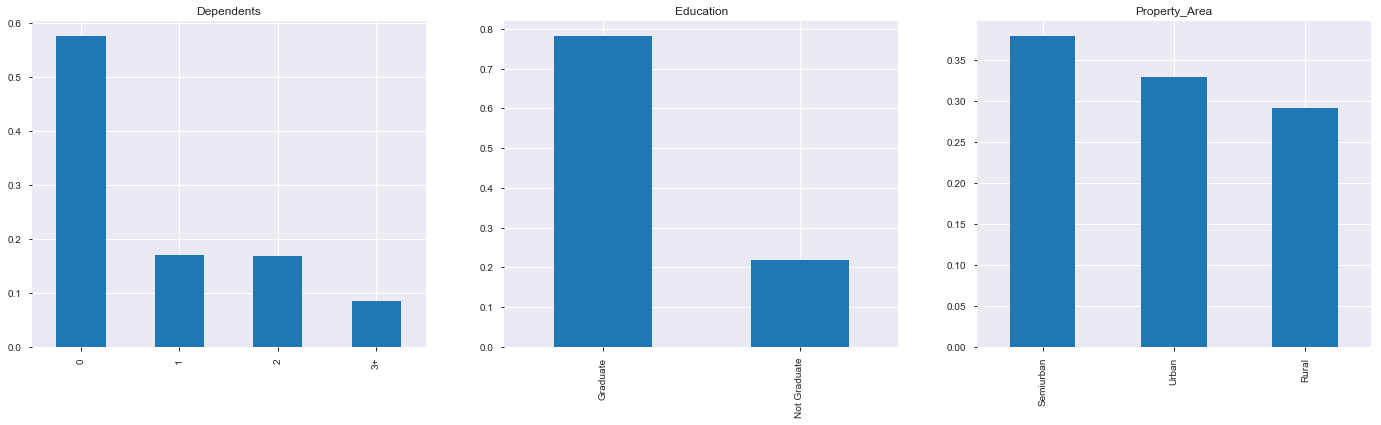

In [215]:
#Now let’s visualize the ordinal variables.
plt.figure(1)
plt.subplot(131)
train_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')

plt.subplot(132)
train_data['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

In [216]:
##Following inferences can be made from the above bar plots:
#1. Most of the applicants don’t have any dependents.
#2. Around 80% of the applicants are Graduate.
#3. Most of the applicants are from Semiurban area.

In [217]:
#Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


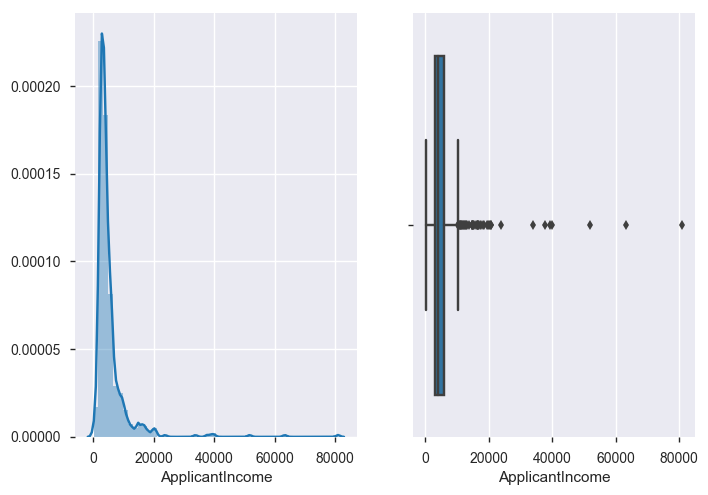

In [313]:
#Lets look at the distribution of Applicant income first.
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['ApplicantIncome']);
plt.subplot(122)
sns.boxplot(train_data['ApplicantIncome'])


In [219]:
#Detailed profiling using pandas profiling
profile = pandas_profiling.ProfileReport(train_data)


In [220]:
type(profile)

pandas_profiling.ProfileReport

In [221]:
#Download detailed profiling using pandas profiling
profile.to_file(outputfile = "C:/Users/sandeep.ram/Desktop/AV/loan_pred_profile.html")

In [222]:
#Detailed profiling using pandas profiling
pandas_profiling.ProfileReport(train_data)

Number of variables,13
Number of observations,614
Total Missing (%),1.9%
Total size in memory,62.4 KiB
Average record size in memory,104.1 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),1
Rejected,0


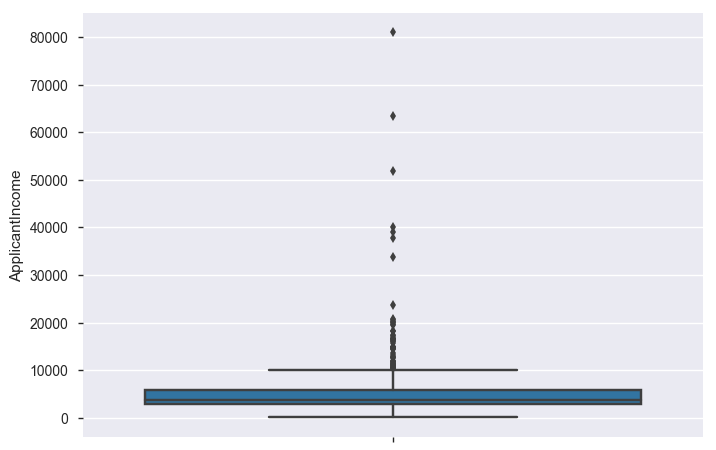

In [223]:
sns.boxplot(y='ApplicantIncome', data = train_data)

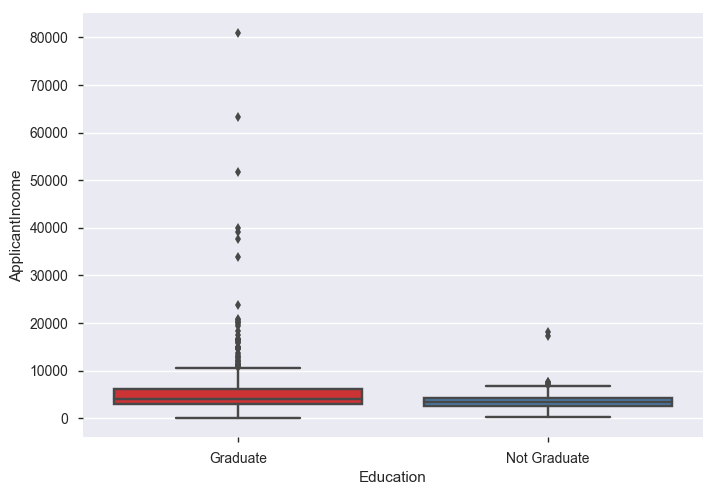

In [224]:
sns.boxplot(x='Education',y='ApplicantIncome', data = train_data,orient='v',palette='Set1')

In [225]:
#We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.


C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


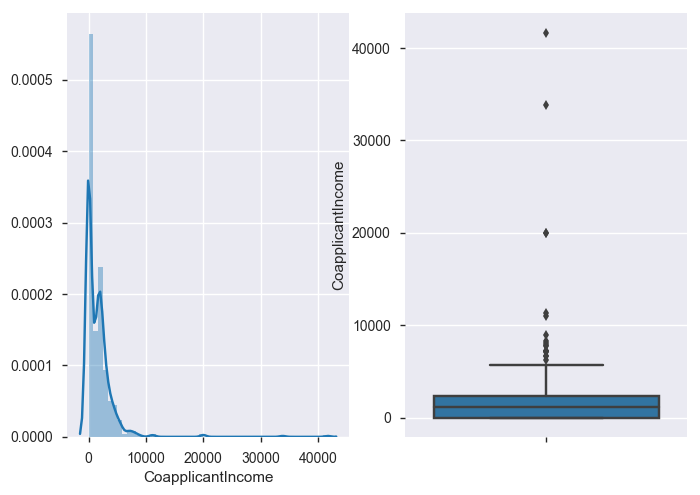

In [226]:
#lets look at coapplicant income
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['CoapplicantIncome']);

plt.subplot(122)
sns.boxplot(y='CoapplicantIncome', data = train_data)

plt.show()

In [227]:
#We see a similar distribution as that of the applicant income. 
#Majority of coapplicant’s income ranges from 0 to 5000. 
#We also see a lot of outliers in the coapplicant income and it is not normally distributed.


In [228]:
train_data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


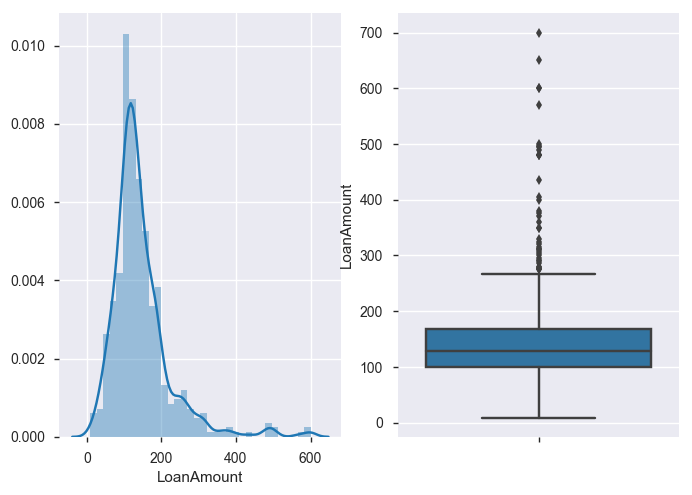

In [229]:
#Let’s look at the distribution of LoanAmount variable.
plt.figure(1)
plt.subplot(121)
df = train_data.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
sns.boxplot(y= 'LoanAmount', data=train_data)
plt.show()


In [230]:
#We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

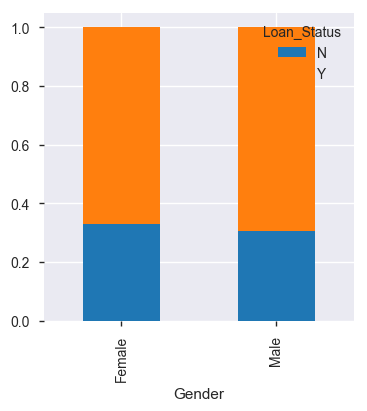

In [231]:
#Now we would like to know how well each feature correlate with Loan Status.Hence, we look at bivariate analysis.

#First of all we will find the relation between target variable and categorical independent variables.
#Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans for Gender categories
Gender = pd.crosstab(train_data['Gender'],train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True,figsize=(4,4))

In [232]:
#It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

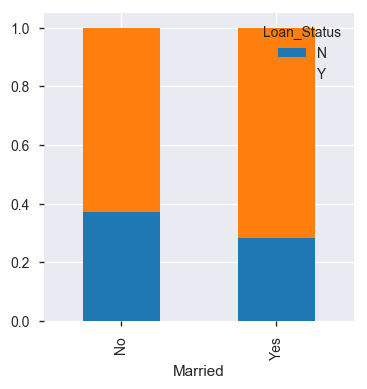

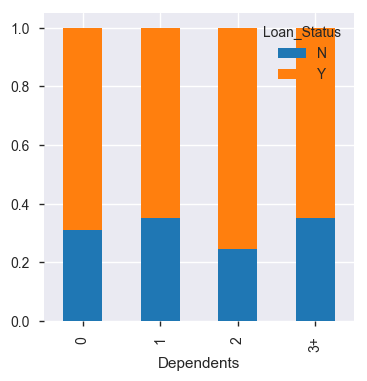

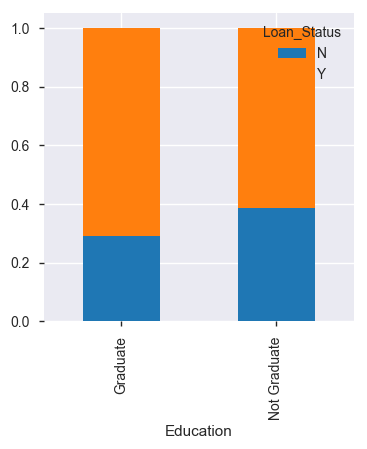

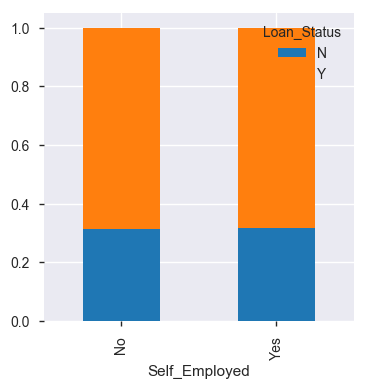

In [233]:
#Now let us visualize the remaining categorical variables vs target variable.
Married=pd.crosstab(train_data['Married'],train_data['Loan_Status'])
Dependents=pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
Education=pd.crosstab(train_data['Education'],train_data['Loan_Status'])
Self_Employed=pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
#plt.show()

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
#plt.show()

Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
#plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
#plt.show()


In [234]:
#Proportion of married applicants is higher for the approved loans.
#Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
#There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

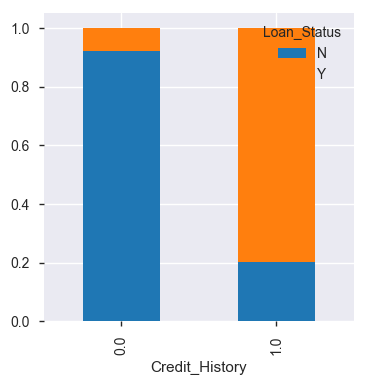

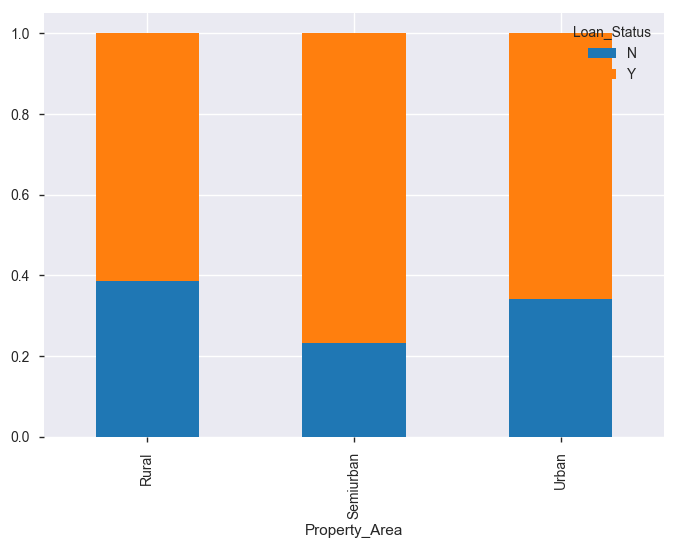

In [235]:
Credit_History=pd.crosstab(train_data['Credit_History'],train_data['Loan_Status'])
Property_Area=pd.crosstab(train_data['Property_Area'],train_data['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

In [236]:
#It seems people with credit history as 1 are more likely to get their loans approved.
#Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

In [237]:
#Now let’s visualize numerical independent variables with respect to target variable.

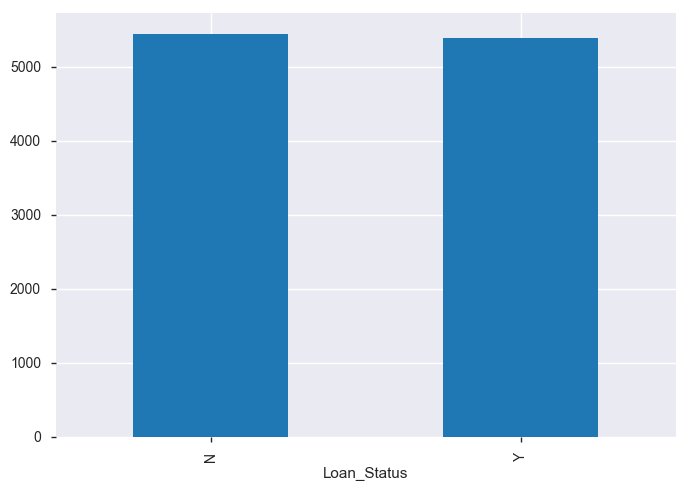

In [238]:
#We will try to find the mean income of people for which the loan has been approved vs the mean income of people for 
#which the loan has not been approved.
train_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [239]:
#Here the y-axis represents the mean applicant income. 
#We don’t see any change in the mean income. 
#So, let’s make bins for the applicant income variable based on the values in it and 
#analyze the corresponding loan status for each bin.

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_data['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

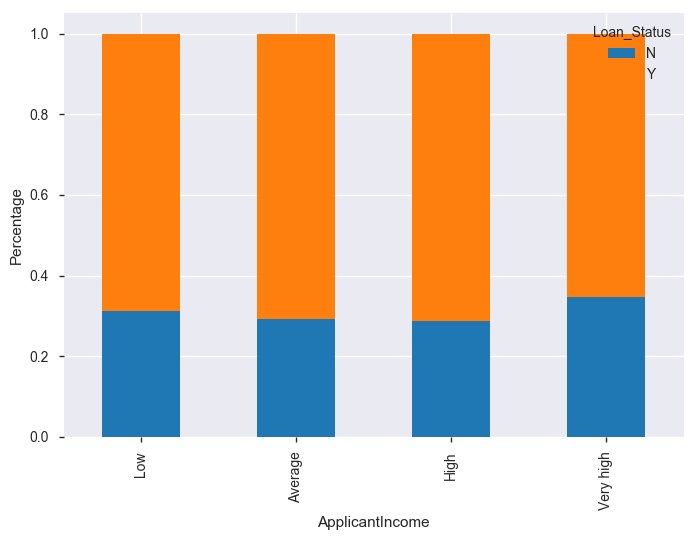

In [240]:
Income_bin=pd.crosstab(train_data['Income_bin'],train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [241]:
#It can be inferred that Applicant income does not affect the chances of loan approval which 
#contradicts our hypothesis in which we assumed that if the applicant income is high the chances of 
#loan approval will also be high.

In [242]:
#We will analyze the coapplicant income and loan amount variable in similar manner.
bins=[0,1000,3000,42000]
groups=["Low","Average","High"]
train_data['Coapplicant_income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=groups)

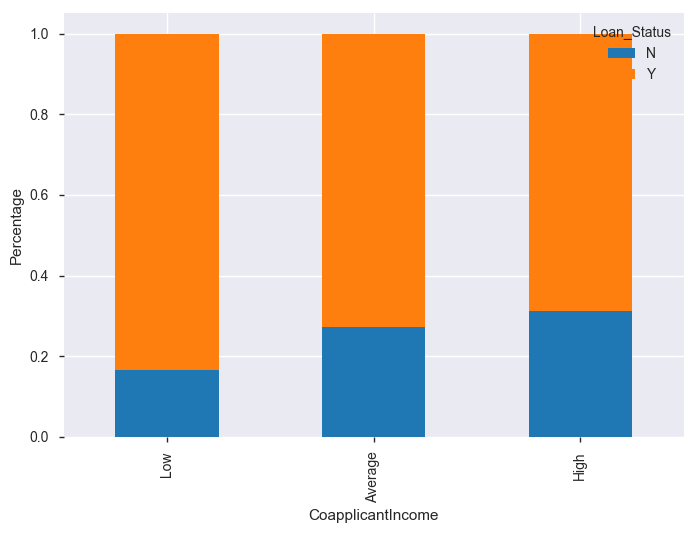

In [243]:
Coapplicant_income_bin = pd.crosstab(train_data['Coapplicant_income_bin'],train_data['Loan_Status'])
Coapplicant_income_bin.div(Coapplicant_income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

In [244]:
#It shows that if coapplicant’s income is less the chances of loan approval are high. 
#But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant 
#so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. 
#So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to 
#visualize the combined effect of income on loan approval.

In [247]:
#Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.
#train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
#test_data['Total_Income']=test_data['ApplicantIncome']+test_data['CoapplicantIncome']
#lets try avg total income
train_data['Avg_Total_Income']=(train_data['ApplicantIncome']+train_data['CoapplicantIncome'])/2
test_data['Avg_Total_Income']=(test_data['ApplicantIncome']+test_data['CoapplicantIncome'])/2
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_data['Avg_Total_Income_bin']=pd.cut(train_data['Avg_Total_Income'],bins,labels=group)

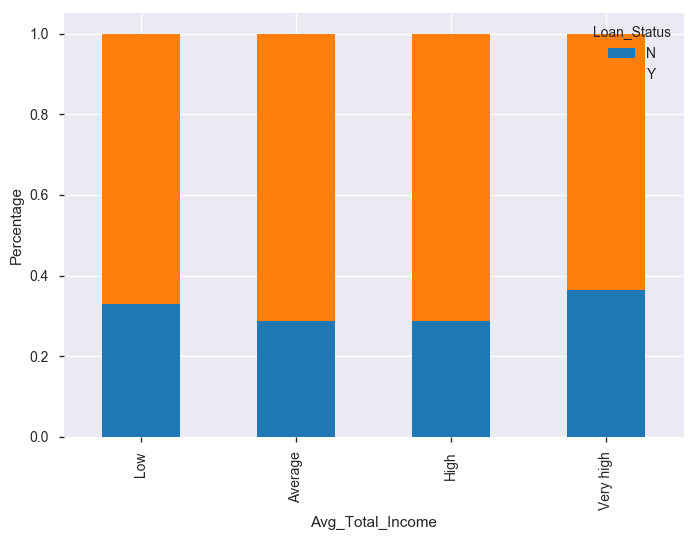

In [248]:
Avg_Total_Income_bin=pd.crosstab(train_data['Avg_Total_Income_bin'],train_data['Loan_Status'])
Avg_Total_Income_bin.div(Avg_Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Avg_Total_Income')
P = plt.ylabel('Percentage')

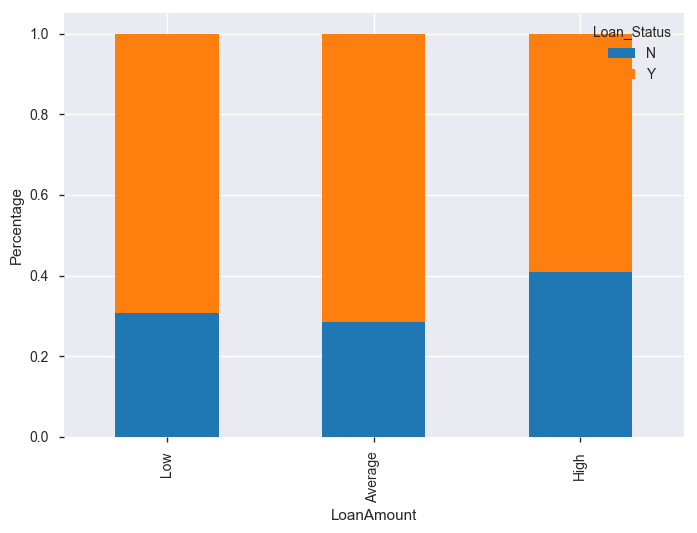

In [249]:
#We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to 
#that of applicants with Average, High and Very High Income.

#Let’s visualize the Loan amount variable.

bins=[0,100,200,700]
group=['Low','Average','High']
train_data['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train_data['LoanAmount_bin'],train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [ ]:
#It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of 
#High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will 
#be high when the loan amount is less.

#Let’s drop the bins which we created for the exploration part. 
#We will change the 3+ in dependents variable to 3 to make it a numerical variable.
#We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with 
#numerical variables. One more reason to do so is few models like logistic regression takes only numeric 
#values as input. We will replace N with 0 and Y with 1.

In [250]:
train_data=train_data.drop(['Income_bin', 'Coapplicant_income_bin', 'LoanAmount_bin', 'Avg_Total_Income_bin'],axis=1)

In [251]:
train_data['Dependents'].replace('3+', 3,inplace=True)
test_data['Dependents'].replace('3+', 3,inplace=True)
train_data['Loan_Status'].replace('N', 0,inplace=True)
train_data['Loan_Status'].replace('Y', 1,inplace=True)

In [252]:
#Now lets look at the correlation between all the numerical variables. 
#We will use the heat map to visualize the correlation. 
#Heatmaps visualize data through variations in coloring. 
#The variables with darker color means their correlation is more.

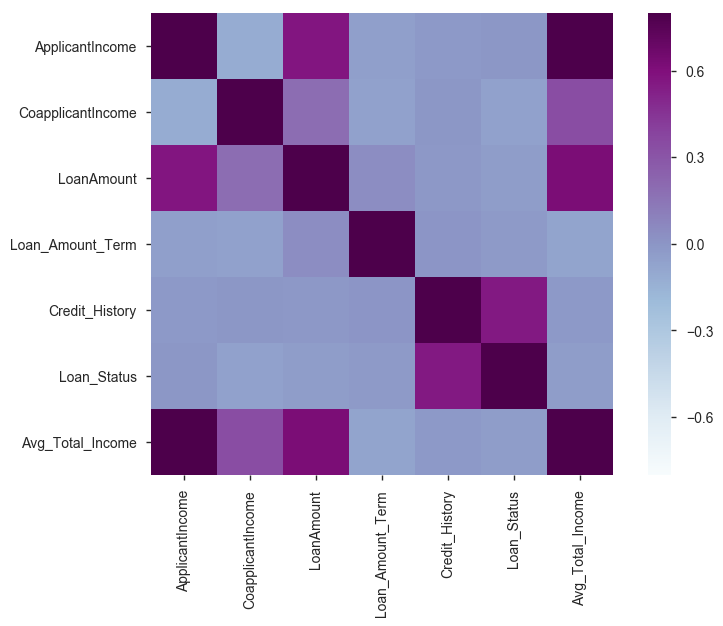

In [253]:
matrix = train_data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [254]:
#We see that the most correlated variables are (ApplicantIncome - LoanAmount) and 
#(Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

In [255]:
#After exploring all the variables in our data, we can now impute the missing values and treat the 
#outliers because missing data and outliers can have adverse effect on the model performance.


In [256]:
#Missing value imputation
#Let’s list out feature-wise count of missing values.
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Avg_Total_Income      0
dtype: int64

In [257]:
#There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and 
#Credit_History features.We will treat the missing values in all the features one by one.

#We can consider these methods to fill the missing values:

#For numerical variables: imputation using mean or median
#For categorical variables: imputation using mode

In [258]:
#There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features 
#so we can fill them using the mode of the features.

train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [259]:
#Now let’s try to find a way to fill the missing values in Loan_Amount_Term. 
#We will look at the value count of the Loan amount term variable.
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [260]:
#It can be seen that in loan amount term variable, the value of 360 is repeating the most. 
#So we will replace the missing values in this variable using the mode of this variable.
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [261]:
#Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the 
#missing values. We will use median to fill the null values as earlier we saw that loan amount have 
#outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [262]:
#Now lets check whether all the missing values are filled in the dataset.
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Avg_Total_Income     0
dtype: int64

In [263]:
#As we can see that all the missing values have been filled in the test dataset. 
#Let’s fill all the missing values in the test dataset too with the same approach.
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)


In [264]:
#Outlier Treatment
#As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the 
#presence of outliers affects the distribution of the data.

#It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence 
#affecting the distribution. We must take steps to remove outliers from our data sets.
#Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. 
#This is called right skewness. One way to remove the skewness is by doing the log transformation. 
#As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 
#So, we get a distribution similar to normal distribution.b

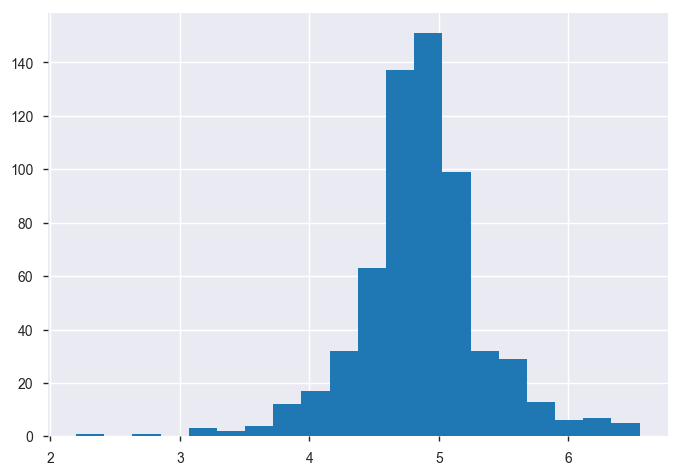

In [265]:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

In [266]:
#Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 
#Let’s build a logistic regression model and make predictions for the test dataset.

In [267]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Avg_Total_Income,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,2924.5,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,3045.5,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,1500.0,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,2470.5,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,3000.0,4.948760


Evaluation Metrics for Classification Problems

The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:

Accuracy: Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. This is how a confusion matrix looks like:

True Positive - Targets which are actually true(Y) and we have predicted them true(Y)
True Negative - Targets which are actually false(N) and we have predicted them false(N)
False Positive - Targets which are actually false(N) but we have predicted them true(T)
False Negative - Targets which are actually true(T) but we have predicted them false(N)

Using these values, we can calculate the accuracy of the model. The accuracy is given by:

(TP+TN)/TP+TN+FP+FN

Precision: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true.
Precision = TP / (TP + FP)

Recall(Sensitivity) - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’.
Recall = TP / (TP + FN)

Specificity - It is a measure of how many observations of false class are labeled correctly.
Specificity = TN / (TN + FP)

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

ROC curve
Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).




1. Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

2. Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.

3. This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function3. 

In [268]:
#Lets drop the Loan_ID variable as it do not have any effect on the loan status. 
#We will do the same changes to the test dataset which we did for the training dataset.
train_data=train_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)


In [269]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Avg_Total_Income,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,2860.0,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,2288.0,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,3400.0,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,2443.0,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1638.0,4.356709


We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [270]:
X=train_data.drop('Loan_Status',1)

In [271]:
y=train_data.Loan_Status

In [272]:
#Now we will make dummy variables for the categorical variables. 
#Dummy variable turns categorical variables into a series of 0 and 1, 
#making them lot easier to quantify and compare. Let us understand the process of dummies first:

#Consider the “Gender” variable. It has two classes, Male and Female.
#As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
#Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
#Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.


X=pd.get_dummies(X)
train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

In [273]:
#We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [275]:
x_cv

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Avg_Total_Income,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
142,6950,0.0,175.0,180.0,1.0,3475.0,5.164786,0,1,1,...,1,0,0,1,0,0,1,0,1,0
369,19730,5266.0,570.0,360.0,1.0,12498.0,6.345636,0,1,0,...,1,0,0,1,0,1,0,1,0,0
510,3598,1287.0,100.0,360.0,1.0,2442.5,4.605170,0,1,1,...,1,0,0,0,1,1,0,1,0,0
220,2221,0.0,60.0,360.0,0.0,1110.5,4.094345,0,1,0,...,1,0,0,1,0,1,0,0,0,1
458,4354,0.0,136.0,360.0,1.0,2177.0,4.912655,0,1,1,...,0,0,1,1,0,1,0,1,0,0
332,2833,0.0,71.0,360.0,1.0,1416.5,4.262680,0,1,1,...,1,0,0,1,0,1,0,0,0,1
79,3333,2166.0,130.0,360.0,1.0,2749.5,4.867534,0,1,0,...,0,0,0,0,1,0,1,0,1,0
418,1025,2773.0,112.0,360.0,1.0,1899.0,4.718499,0,1,0,...,1,0,0,1,0,1,0,1,0,0
279,4100,0.0,124.0,360.0,1.0,2050.0,4.820282,1,0,0,...,1,0,0,0,1,1,0,1,0,0
209,3418,0.0,127.0,360.0,1.0,1709.0,4.844187,0,1,1,...,1,0,0,1,0,1,0,0,1,0


In [276]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization. To learn about other parameters, refer here: http://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

In [277]:
#Let’s predict the Loan_Status for validation set and calculate its accuracy.
pred_cv=model.predict(x_cv)

In [278]:
pred_cv

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [279]:
#Let us calculate how accurate our predictions are by calculating the accuracy.
accuracy_score(y_cv,pred_cv)

0.84324324324324329

In [280]:
test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Avg_Total_Income,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,2860.0,4.700480,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,2288.0,4.836282,0,1,0,...,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,3400.0,5.337538,0,1,0,...,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,2443.0,4.605170,0,1,0,...,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,1638.0,4.356709,0,1,1,...,1,0,0,0,1,1,0,0,0,1


So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

In [281]:
#Let’s make predictions for the test dataset.
pred_test = model.predict(test_data)

In [282]:
submission=pd.read_csv('C:/Users/sandeep.ram/Desktop/AV/LoanPred_new/Sample_Submission_ZAuTl8O_FK3zQHh.csv')

We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.

In [283]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

In [284]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [285]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [286]:
#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [181]:
#Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

In [287]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('C:/Users/sandeep.ram/Desktop/AV/LoanPred_new/logistic_new2.csv')

# Logistic Regression using stratified k-folds cross validation
To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

The validation set approach
k-fold cross validation
Leave one out cross validation (LOOCV)
Stratified k-fold cross validation
If you wish to know more about validation techniques, then please refer this article: https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

In this section we will learn about stratified k-fold cross validation. Let us understand how it works:

Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
It is generally a better approach when dealing with both bias and variance.
A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.
Below is the visualization of a stratified k-fold validation when k=5.


Let’s import StratifiedKFold from sklearn and fit the model.


In [184]:
from sklearn.model_selection import StratifiedKFold

# Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset.

In [185]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     print('train_index',train_index)
     print('test_index',test_index)
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1



1 of kfold 5
train_index [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18  20
  21  22  23  24  26  28  29  31  32  33  36  37  41  43  44  45  47  48
  49  50  51  52  54  57  58  59  60  61  62  63  64  65  66  67  69  70
  71  72  76  78  79  81  82  83  85  86  87  88  89  90  91  92  93  97
  99 100 103 104 105 106 107 108 109 111 112 113 115 116 117 118 119 120
 121 122 123 124 126 127 129 131 133 134 135 136 137 139 140 141 142 143
 144 145 146 147 149 150 151 152 153 155 156 157 159 160 162 163 164 165
 167 168 169 170 172 173 175 177 178 180 181 182 183 184 185 186 187 188
 190 191 192 193 194 195 196 197 200 201 204 206 207 208 209 211 212 213
 214 215 216 217 218 219 220 221 223 224 225 226 227 229 230 231 232 233
 234 236 237 238 239 240 241 242 244 245 246 247 248 249 250 251 252 253
 257 259 260 261 262 263 264 265 268 269 270 271 272 273 274 275 276 277
 279 280 282 283 284 285 286 288 289 290 291 293 294 295 296 297 298 299
 300 301 302 304 305 306 

In [186]:
yvl

7      0
11     1
22     0
23     0
41     1
45     1
50     1
51     1
54     0
62     0
65     0
72     1
76     0
81     1
85     1
88     1
90     1
99     1
108    0
119    1
123    1
124    1
126    1
127    1
141    1
146    1
147    1
153    0
156    1
159    1
      ..
429    1
434    1
436    1
447    0
449    0
450    0
451    1
452    0
457    0
464    0
465    1
469    0
472    1
474    1
480    1
507    0
510    0
523    1
530    1
546    0
563    1
573    0
577    1
579    1
580    1
582    1
597    0
604    1
607    1
609    1
Name: Loan_Status, dtype: int64

In [187]:
kf.split(X,y)

<generator object _BaseKFold.split at 0x0000000010D55E60>

In [188]:
X.loc[7]

ApplicantIncome            3036.000000
CoapplicantIncome          2504.000000
LoanAmount                  158.000000
Loan_Amount_Term            360.000000
Credit_History                0.000000
Total_Income               5540.000000
LoanAmount_log                5.062595
Gender_Female                 0.000000
Gender_Male                   1.000000
Married_No                    0.000000
Married_Yes                   1.000000
Dependents_3                  1.000000
Dependents_0                  0.000000
Dependents_1                  0.000000
Dependents_2                  0.000000
Education_Graduate            1.000000
Education_Not Graduate        0.000000
Self_Employed_No              1.000000
Self_Employed_Yes             0.000000
Property_Area_Rural           0.000000
Property_Area_Semiurban       1.000000
Property_Area_Urban           0.000000
Name: 7, dtype: float64

In [189]:
pred_test = model.predict(test_data)


In [190]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

In [191]:
pred=model.predict_proba(xvl)[:,1]

In [192]:
pred

array([ 0.31120809,  0.80589999,  0.33687626,  0.17380566,  0.7101953 ,
        0.66972015,  0.8567104 ,  0.81302607,  0.13002484,  0.21520539,
        0.86171296,  0.86920193,  0.62379408,  0.86284865,  0.81533568,
        0.67610197,  0.88746612,  0.88332012,  0.19593211,  0.62583937,
        0.91599036,  0.69763077,  0.69777111,  0.63821804,  0.68348878,
        0.81756644,  0.76340124,  0.75643407,  0.70141582,  0.85482069,
        0.88032618,  0.74218972,  0.16568756,  0.61960025,  0.87011433,
        0.83750466,  0.60045138,  0.89208232,  0.83682144,  0.75224601,
        0.89356312,  0.45444792,  0.90377751,  0.63316571,  0.85764203,
        0.57850715,  0.85294348,  0.75060048,  0.85732624,  0.82661072,
        0.80495117,  0.28801083,  0.8179245 ,  0.88521888,  0.60901883,
        0.69993207,  0.87524357,  0.66417567,  0.75689299,  0.87593073,
        0.6175673 ,  0.64434654,  0.7437761 ,  0.82202822,  0.91109603,
        0.57802953,  0.09379915,  0.67742921,  0.59733867,  0.84

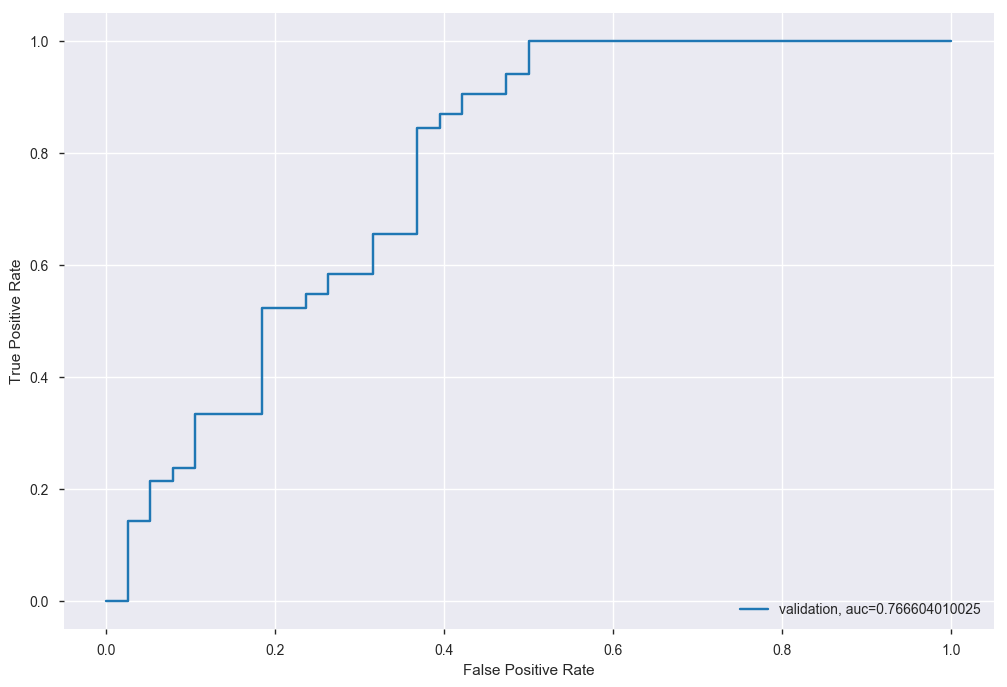

In [193]:
#Let us visualize the roc curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [194]:
len(pred_test)

122

In [195]:
len(submission)

367

# Try with Random Forest and XGBoost

In [288]:
from sklearn.ensemble import RandomForestClassifier

In [290]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test_data)


1 of kfold 5
accuracy_score 0.83064516129

2 of kfold 5
accuracy_score 0.790322580645

3 of kfold 5
accuracy_score 0.795081967213

4 of kfold 5
accuracy_score 0.762295081967

5 of kfold 5
accuracy_score 0.852459016393


# We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

In [291]:
from sklearn.model_selection import GridSearchCV

In [292]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [293]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [294]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [295]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [296]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=61, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [ ]:
#So, the optimized value for the max_depth variable is 5 and for n_estimator is 61. Now let’s build the model using these optimized values.

In [299]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=61)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test_data)
pred2=model.predict_proba(test_data)[:,1]


1 of kfold 5
accuracy_score 0.814516129032

2 of kfold 5
accuracy_score 0.806451612903

3 of kfold 5
accuracy_score 0.795081967213

4 of kfold 5
accuracy_score 0.795081967213

5 of kfold 5
accuracy_score 0.83606557377


In [300]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [301]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [302]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

In [ ]:
#Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so.

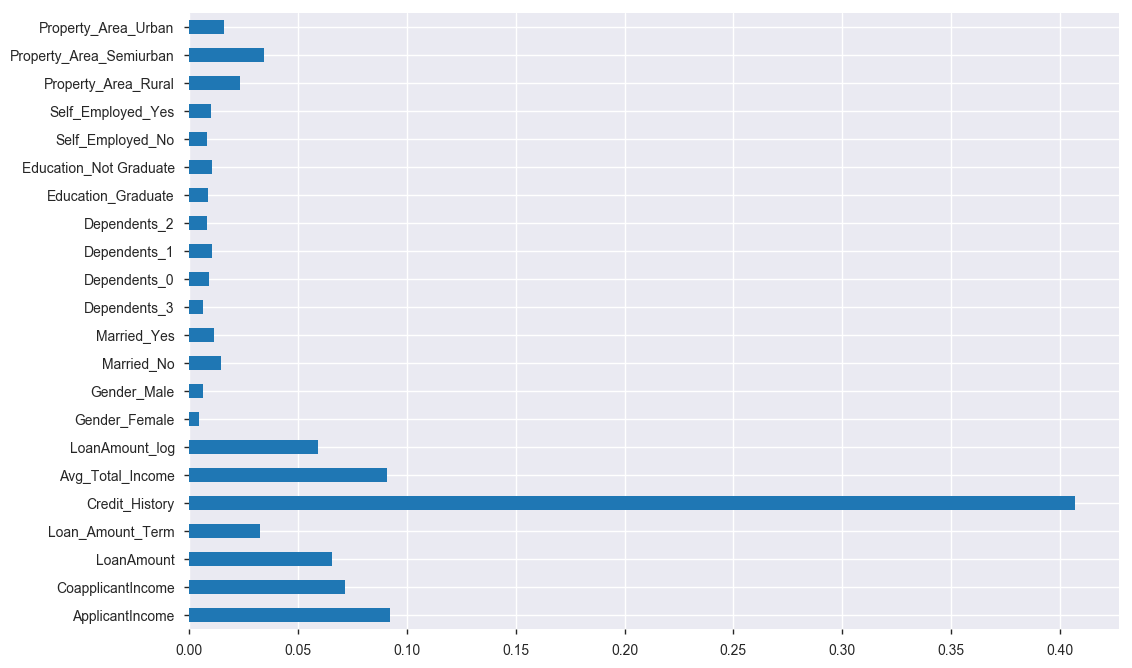

In [303]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [306]:
from xgboost import XGBClassifier

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [312]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=50, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test_data)
pred3=model.predict_proba(test_data)[:,1]


1 of kfold 5
accuracy_score 0.806451612903

2 of kfold 5
accuracy_score 0.814516129032

3 of kfold 5
accuracy_score 0.795081967213

4 of kfold 5
accuracy_score 0.754098360656

5 of kfold 5
accuracy_score 0.827868852459


In [310]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')